# Bank Muamalat Business Intelligence Analyst Project Based Internship


## Soal 1

Sebuah primary key dalam sebuah tabel berfungsi sebagai tanda pengenal sebuah data. Sebagai tanda pengenal, tentu saja tiap data dalam tabel tersebut harus memiliki nilai yang berbeda-beda. Sedangkan untuk Primary key pada 4 dataset penjualan adalah sebagai berikut :
- **Primary key tabel Customer** : CustomerID
- **Primary key tabel Products** : ProdNumber
- **Primary key tabel Orders** : OrderID
- **Primary key tabel ProductCategory** : CategoryID

## Soal 2

Relationship merupakan hubungan atau koneksi antara dua tabel data, berdasarkan pada satu kolom dalam setiap tabel. Untuk menentukan relationship pada 4 dataset tersebut menggunakan Microsoft Acces adalah sebagai berikut :

Keterangan Relationship :
- **CustomerID (Customers) ke CustomerID (Orders)** : One to Many
- **ProdNumber(Products) ke ProdNumber (Orders)** : One to Many
- **CategoryID (ProductCategory) ke Category (Products)** : One to Many


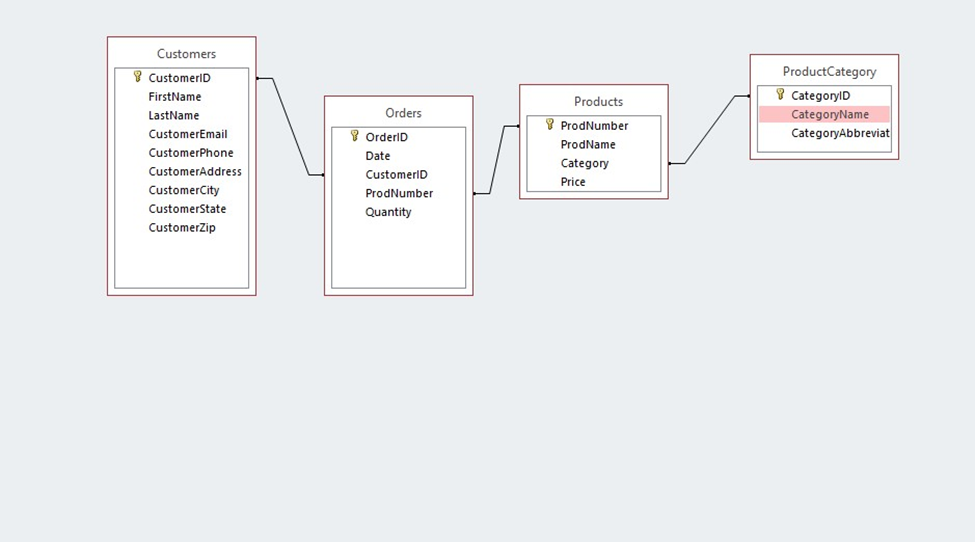

## Soal 3
Untuk membuat tabel master menggunakan Google Big Query dengan Query berikut :


In [ ]:
WITH
  cte_order AS (
    SELECT
      OrderID,
      Date,
      CustomerID,
      ProdNumber,
      Quantity
    FROM
      `bi-muamalat-2022.Orders.Orders`
      order by Date
  ),
  cte_products AS (
    SELECT
      ProdName,
      ProdNumber,
      Category,
      Price
    FROM
      `bi-muamalat-2022.Products.Products`
  ),
  cte_product_category AS (
    SELECT
      CategoryID,
      CategoryName
    FROM 
      `bi-muamalat-2022.ProductCategory.ProductCategory`
  ),
  cte_customers AS (
    SELECT
      CustomerID,
      CustomerEmail,
      CustomerCity
    FROM
      `bi-muamalat-2022.Customers.Customers`
  )
  SELECT
    o.Date,
    c.CategoryName,
    p.ProdName,
    p.Price,
    o.Quantity,
    p.Price*o.Quantity total_sales,
    r.CustomerEmail,
    r.CustomerCity
  FROM
   ( cte_product_category c
      INNER JOIN
          cte_products p ON c.CategoryID = p.Category )
  INNER JOIN
    (
      cte_customers r 
      INNER JOIN
        cte_order o ON r.CustomerID = o.CustomerID)
  ON
    CAST(p.ProdNumber as String ) =  CAST(o.ProdNumber as String)


Setelah dijalankan akan muncul result seperti dibawah, kemudian di save ke CSV

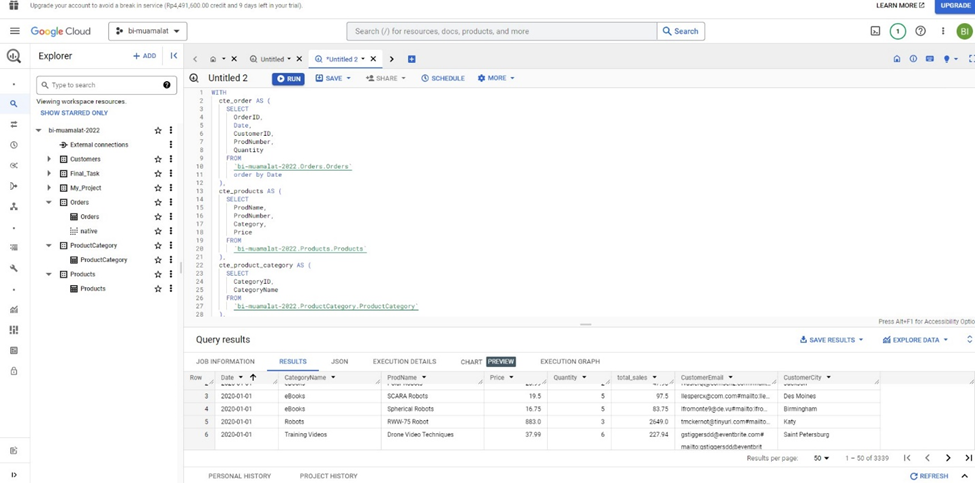

## Soal 4
Untuk membuat visualisasi, disini tidak menggunakan tool looker studio, tetapi menggunakan tools Power BI Desktop. Data source menggunakan data master yang telah dibuat pada soal . Sedangkan untuk membuat visualisasi Top 5 Kategori Produk yang paling tinggi sales dan qty yaitu dengan menambahkan measure baru yaitu sum_qty, sales_total, Ranking_Qty dan Ranking_Sales. 
DAX untuk meaure :

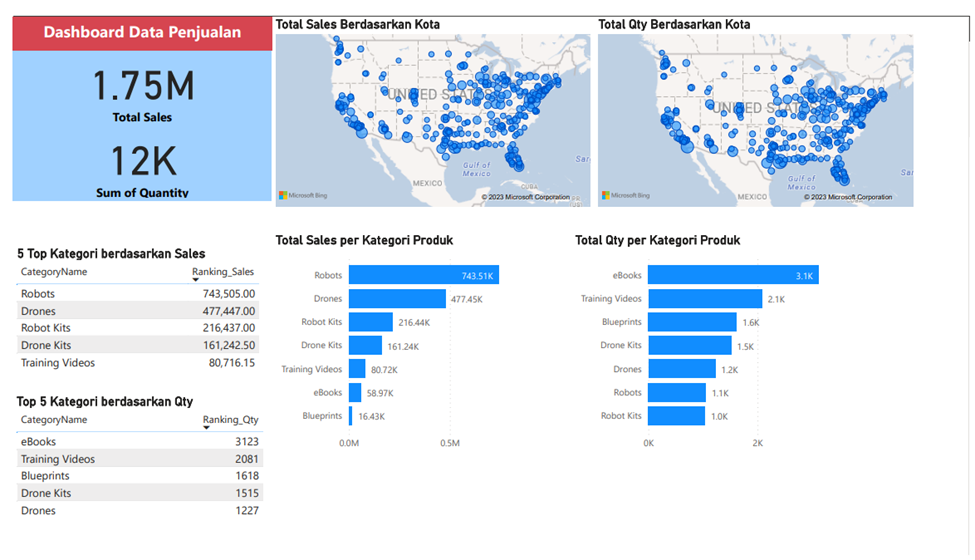

## Soal 5
Dari data penjualan tahun 2020 s.d 2021 penjualan tertinggi ada pada kategori produk Robots. Sedangkan untuk total barang yang paling banyak dijual adalah kategori produk eBooks. Untuk mempertahankan atau meningkatkan dari kedua kategori tersebut, saya mengusulkan mungkin PT. Sejahtera Bersama lebih fokus untuk memasarkan kategori produk tersebut di kota Washington karena kota tersebut yang paling tinggi penjualannya dan total ordernya seperti yang ditunjukkan gambar berikut :

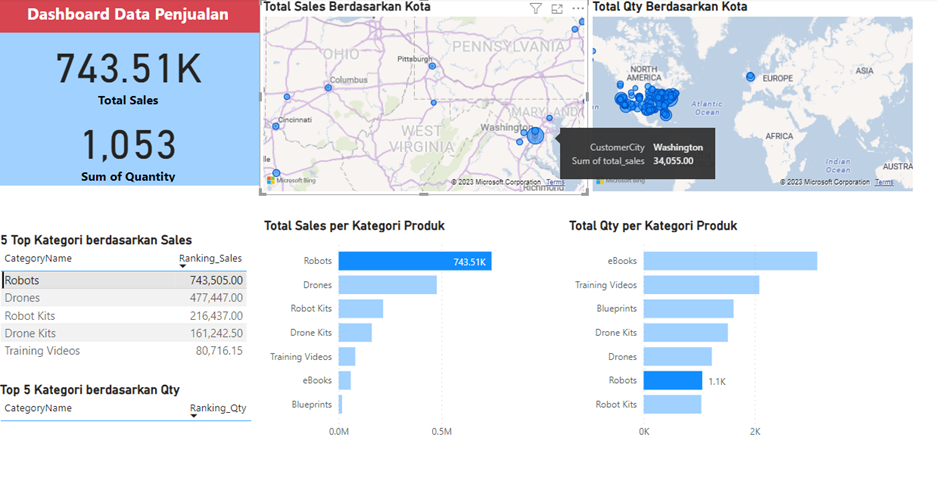
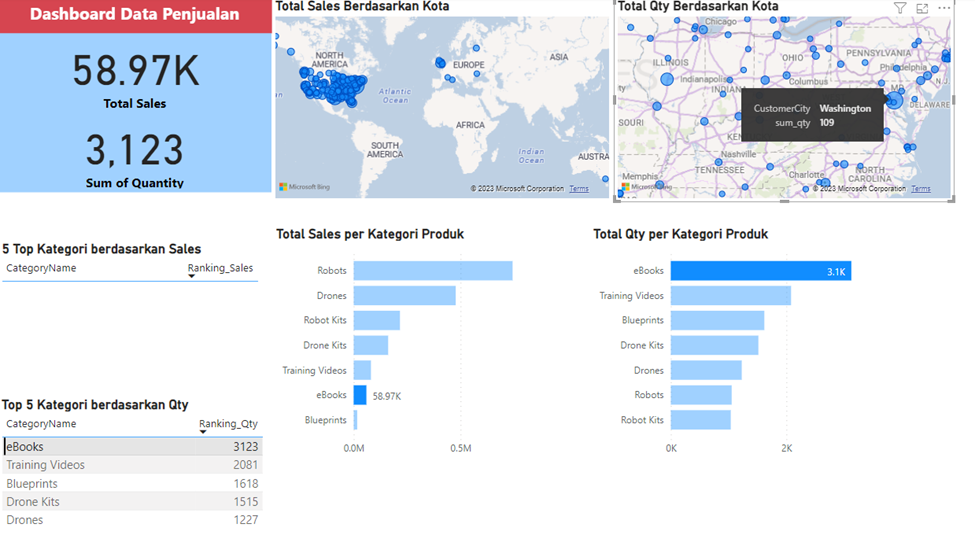